# Social Networks and Text Analysis - Lab 1: Introduction to Networks

Dr Federico Botta: f.botta@exeter.ac.uk (some of this code has been adapted from code by Dr Riccardo Di Clemente)

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
import collections 
import random 
import numpy as np 
from pylab import rcParams 
import matplotlib.colors as mcolors 
import pandas as pd

#Functions (%) for setting up the matplotlib and increase the resolution of the plots:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1 Create the empty network

In [2]:
G=nx.Graph() 
G.add_node(1)
G.add_nodes_from(range(10))

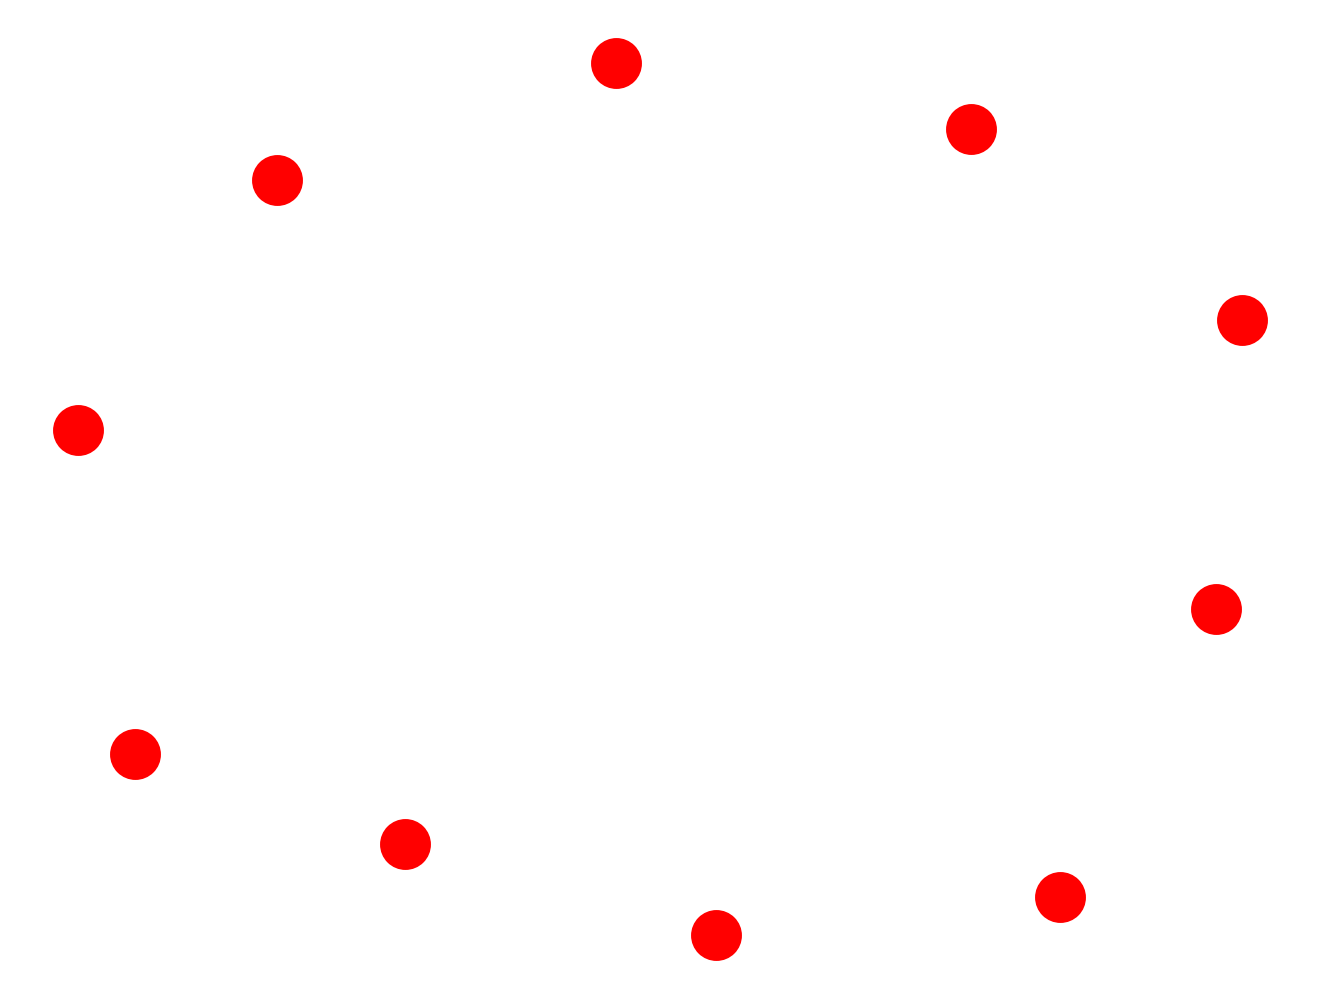

In [3]:
nx.draw(G, node_color='red')

## 2 Add the edges

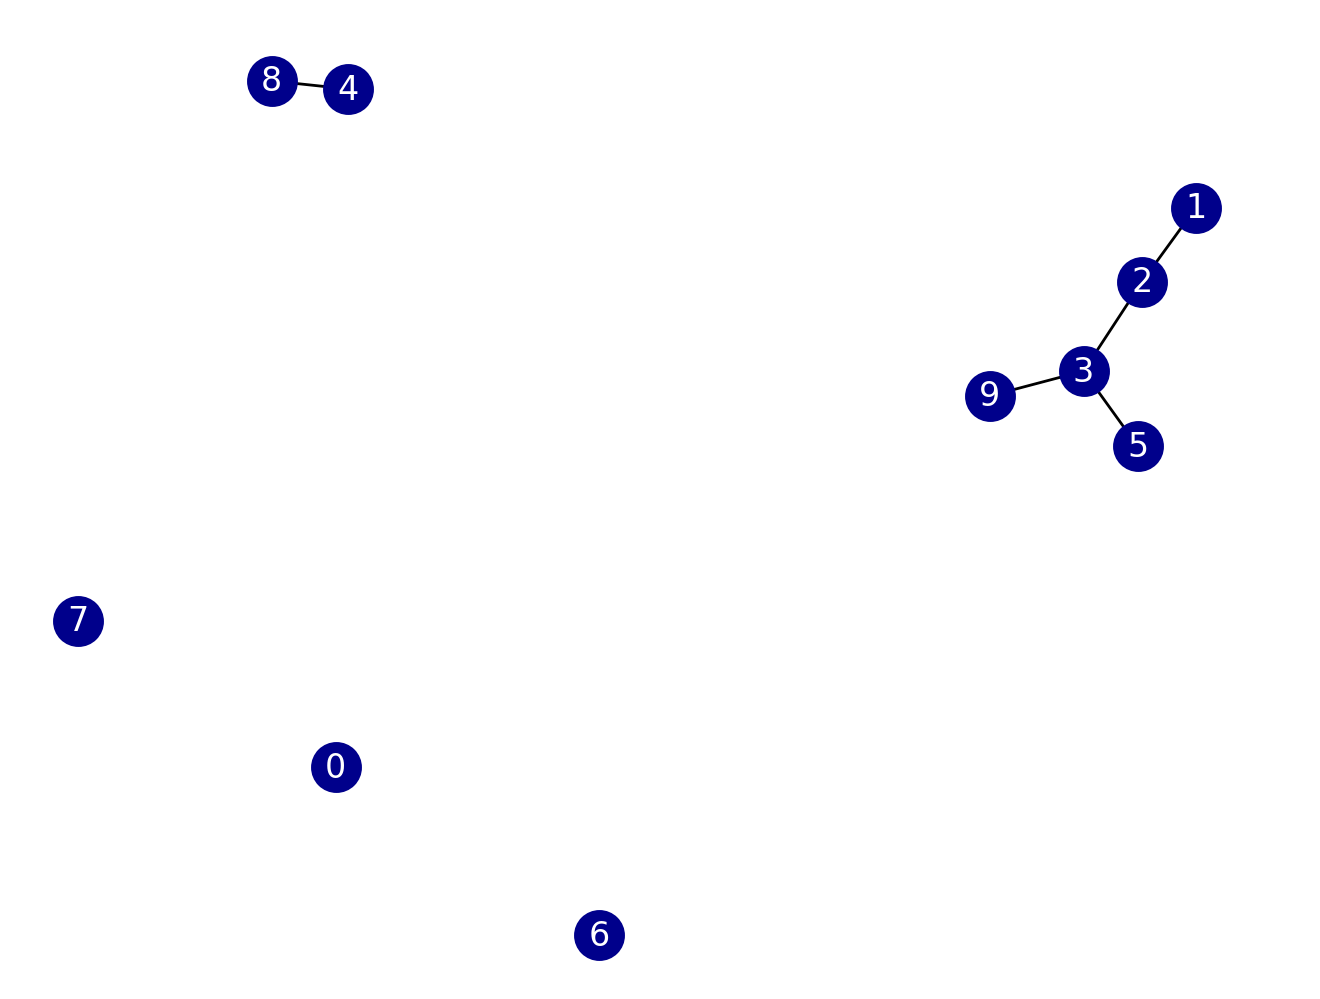

In [4]:
G.add_edge(1,2) 
e=[(2,3),(9,3),(8,4),(3,5)]
G.add_edges_from(e)
nx.draw(G, with_labels=True, node_color='darkblue', font_color='white')

In [5]:
G.number_of_nodes()

10

In [6]:
G.number_of_edges()

5

In [7]:
list(G.neighbors(3))

[2, 9, 5]

In [8]:
G.add_node(1, name = 'Federico')
G.nodes[1]

{'name': 'Federico'}

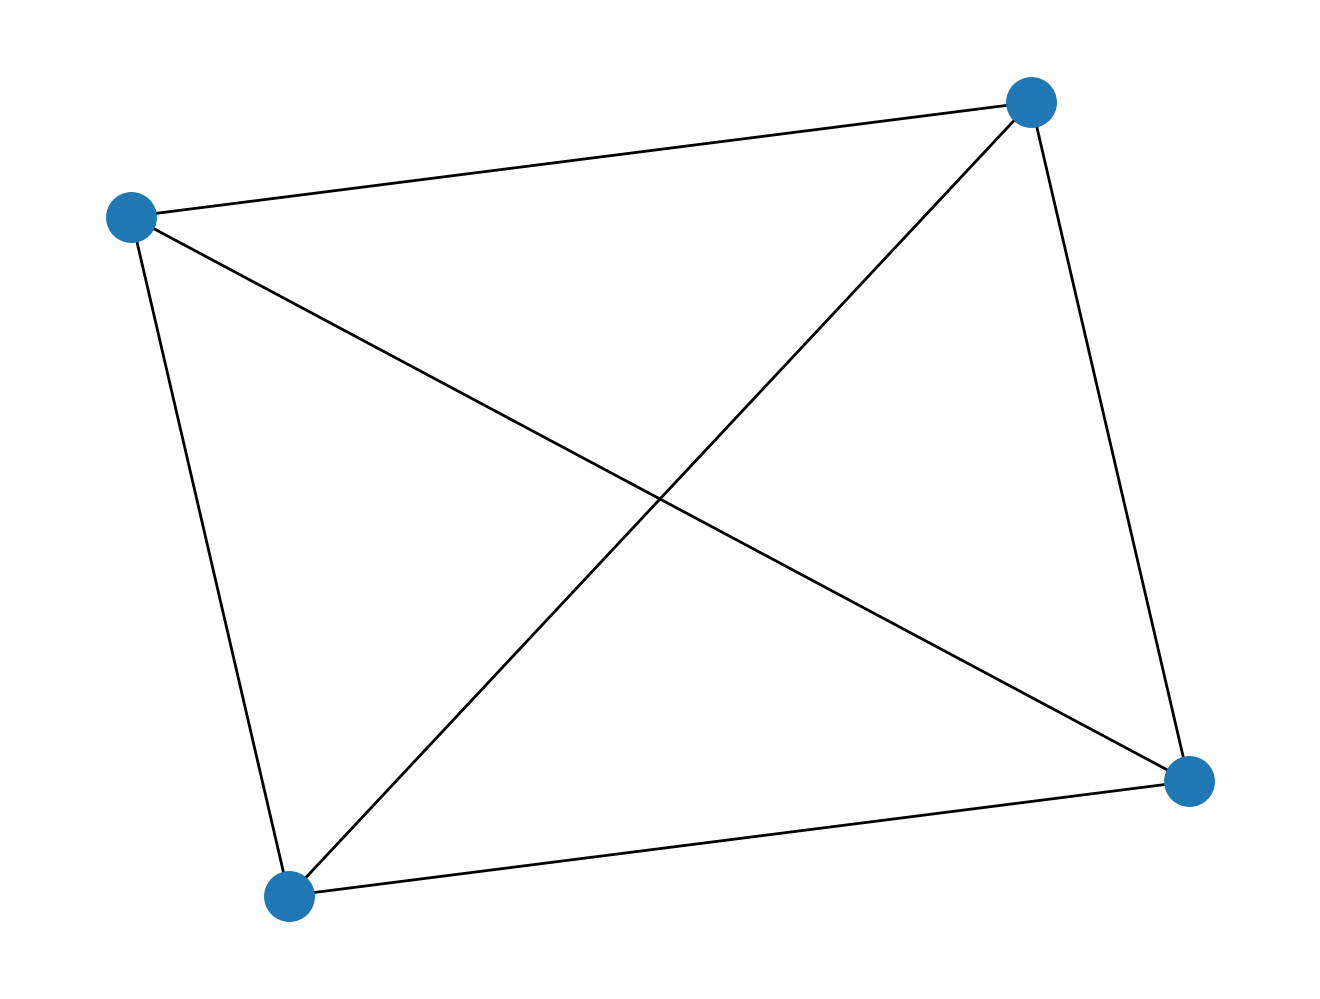

In [9]:
complete_network = nx.complete_graph(4)
nx.draw(complete_network)

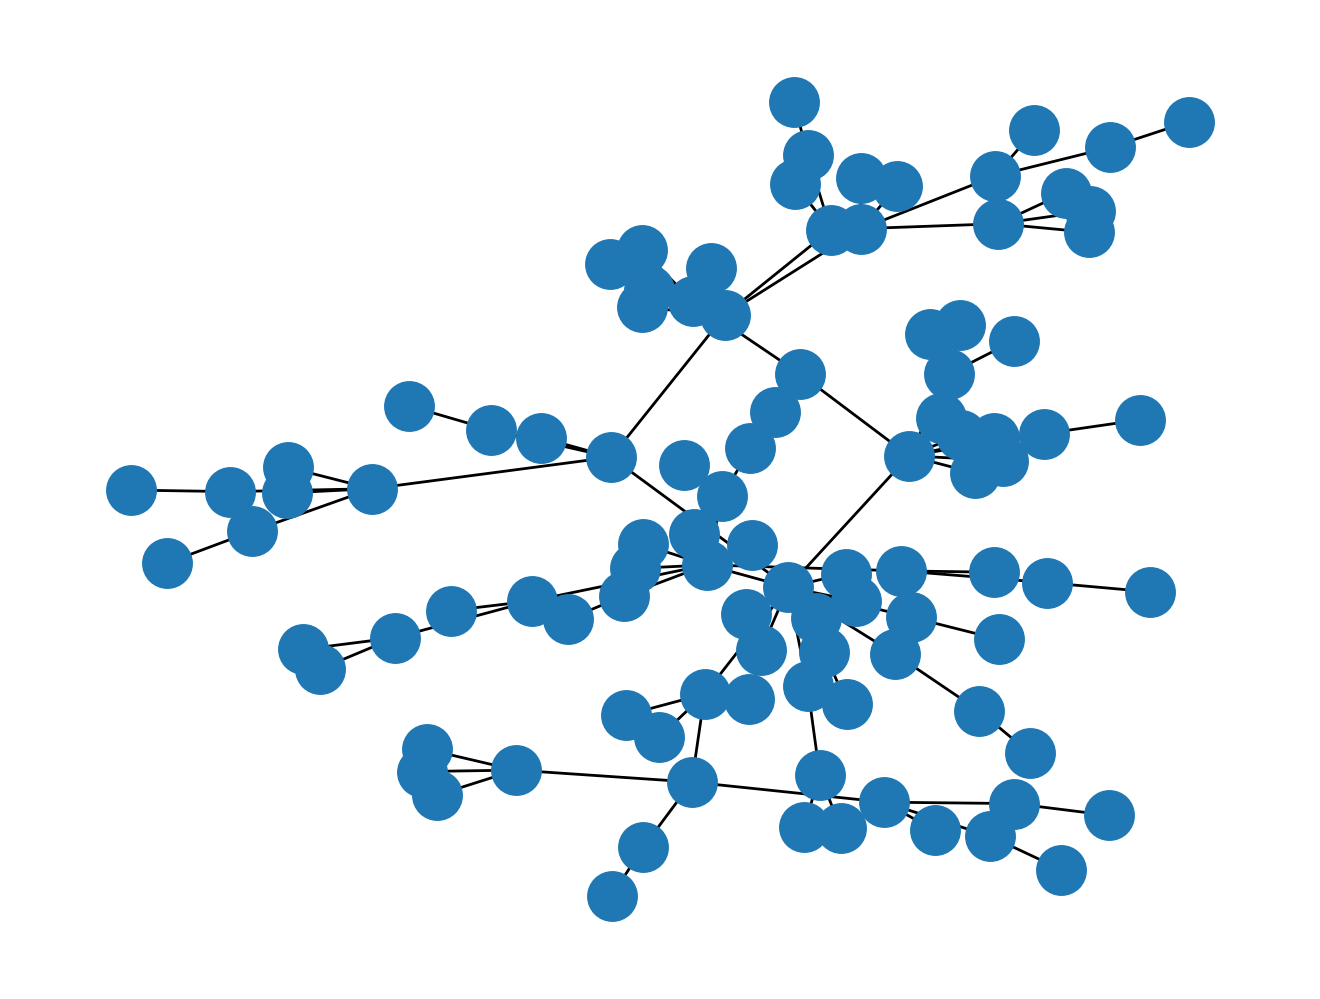

In [10]:
ba = nx.barabasi_albert_graph(100, 1)
nx.draw(ba)

## 3 Check the adjacency matrix

In [11]:
print(nx.adjacency_matrix(G))

  (0, 2)	1
  (2, 0)	1
  (2, 3)	1
  (3, 2)	1
  (3, 5)	1
  (3, 9)	1
  (4, 8)	1
  (5, 3)	1
  (8, 4)	1
  (9, 3)	1


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Text(0, 0.5, 'node idx')

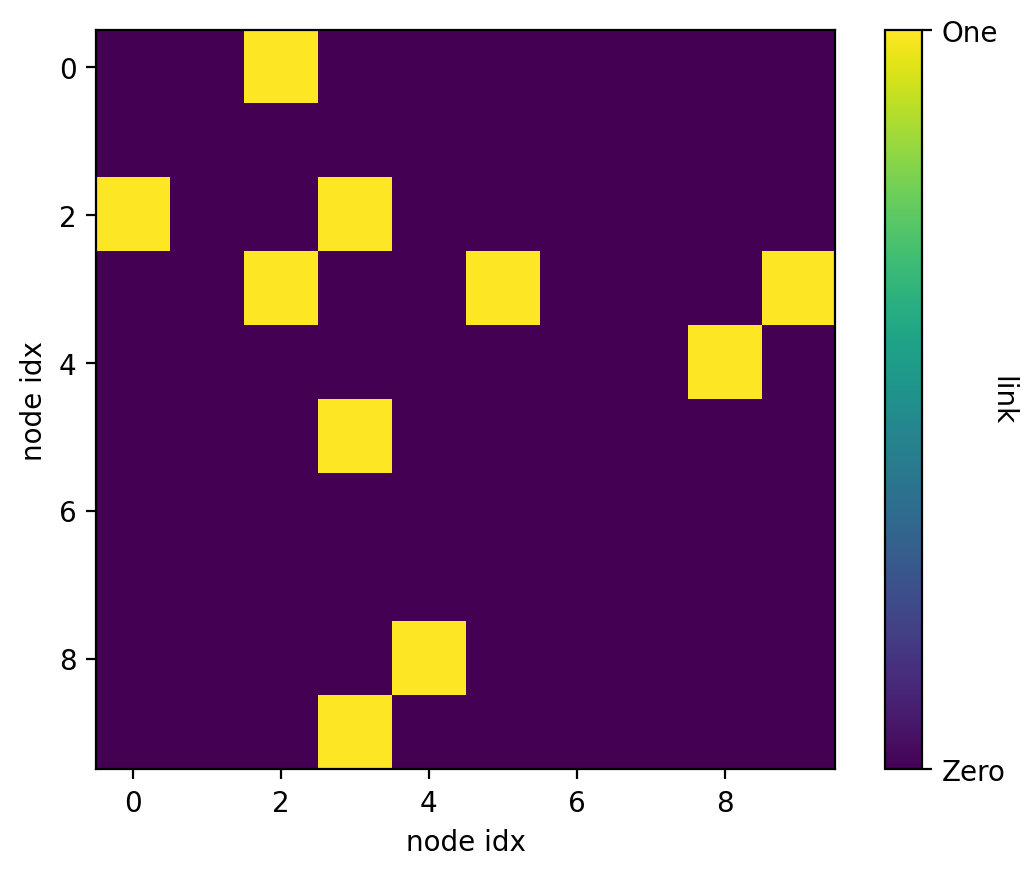

In [17]:
print(nx.to_numpy_array(G)) 
plt.imshow(nx.to_numpy_array(G))
cbar = plt.colorbar() 
cbar.set_ticks([0,1]) 
cbar.ax.set_yticklabels(['Zero','One'],)

cbar.set_label('link', rotation=270)
plt.xlabel('node idx') 
plt.ylabel('node idx') 

## 4. Network layouts with the Zachary's Karate Club:

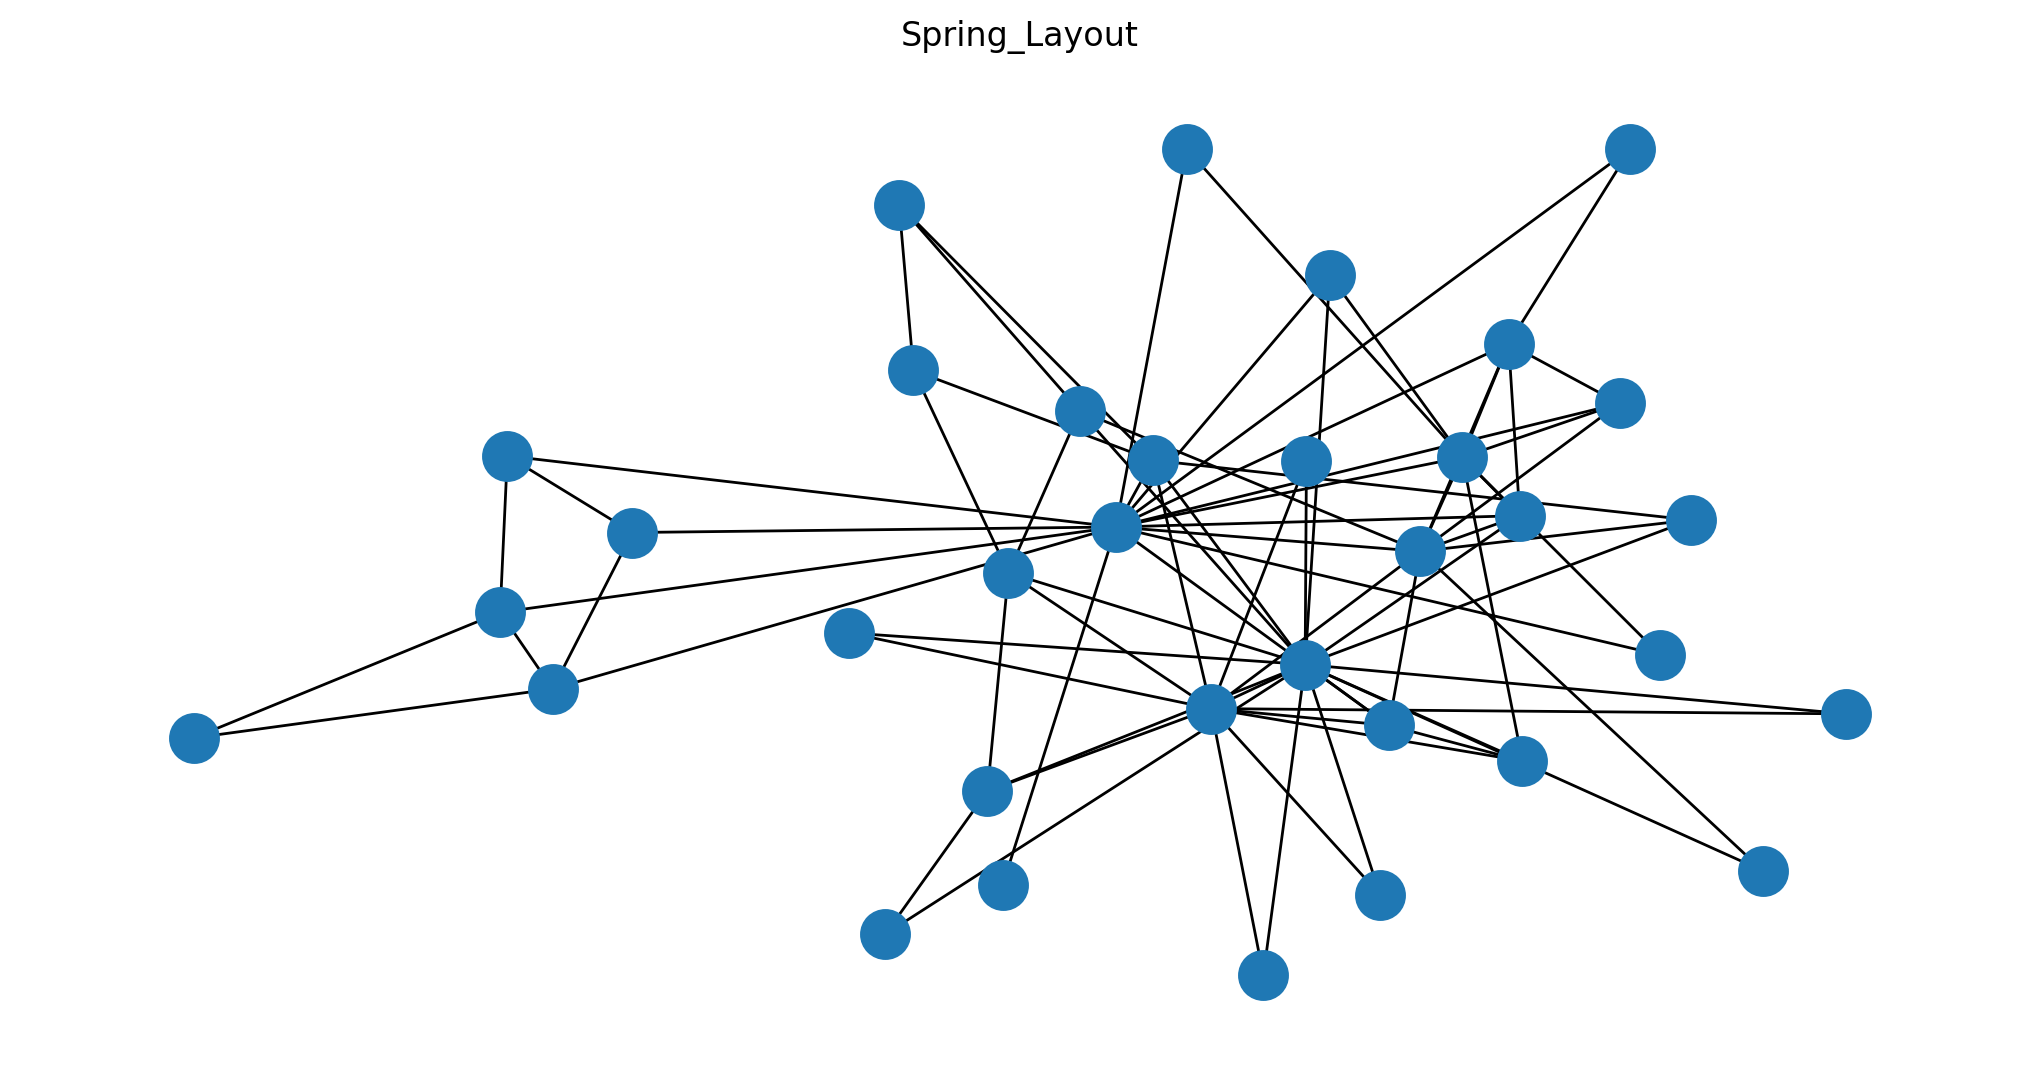

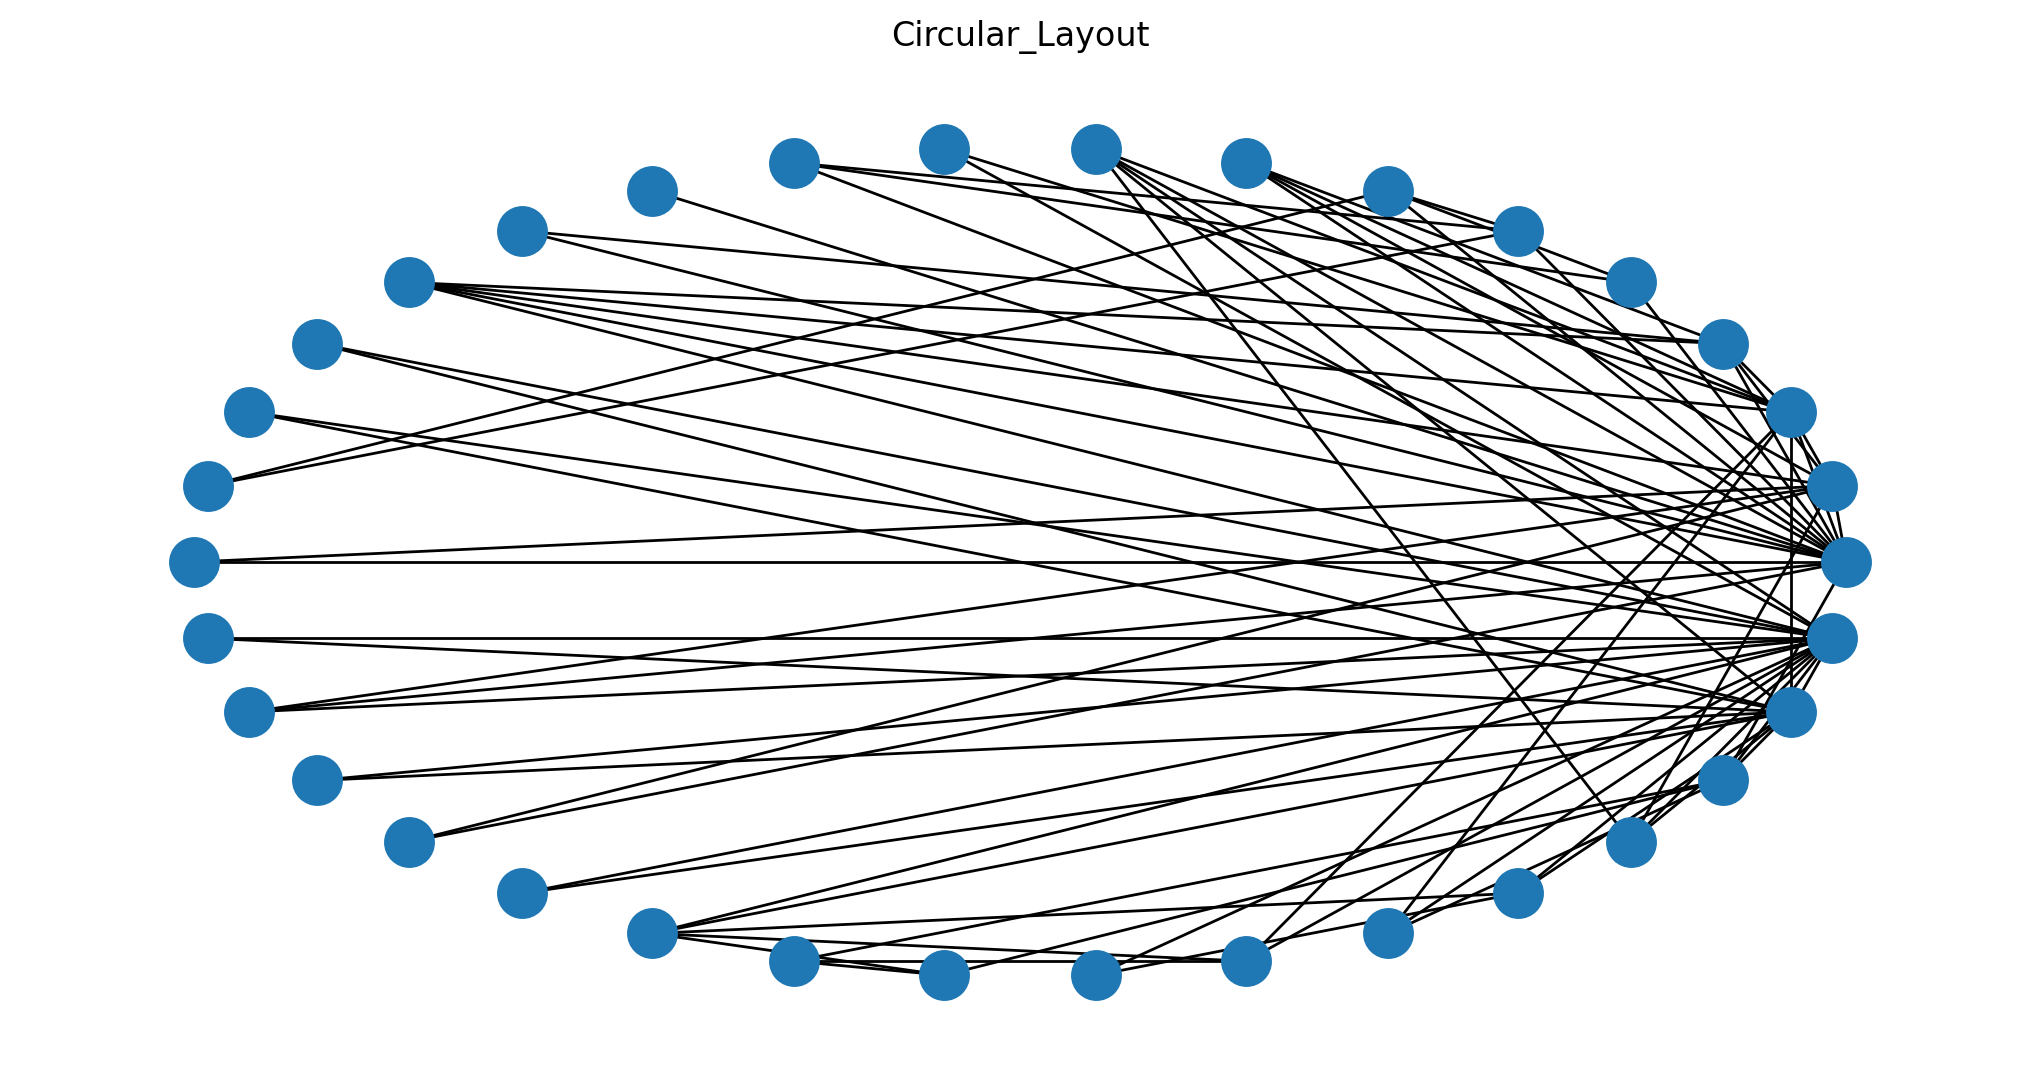

In [35]:
G = nx.karate_club_graph() 

#1. Plotting the network with the first Layout:
#----------------------------------------------
pos = nx.spring_layout(G) #<-- Set the spring layout
nx.draw(G, pos=pos)
plt.title('Spring_Layout')
plt.show()

#1. Plotting the network with the second Layout:
#----------------------------------------------
pos = nx.circular_layout(G) #<-- Set the spring layout
nx.draw(G, pos=pos)
plt.title('Circular_Layout')
plt.show()

Draw network centrality

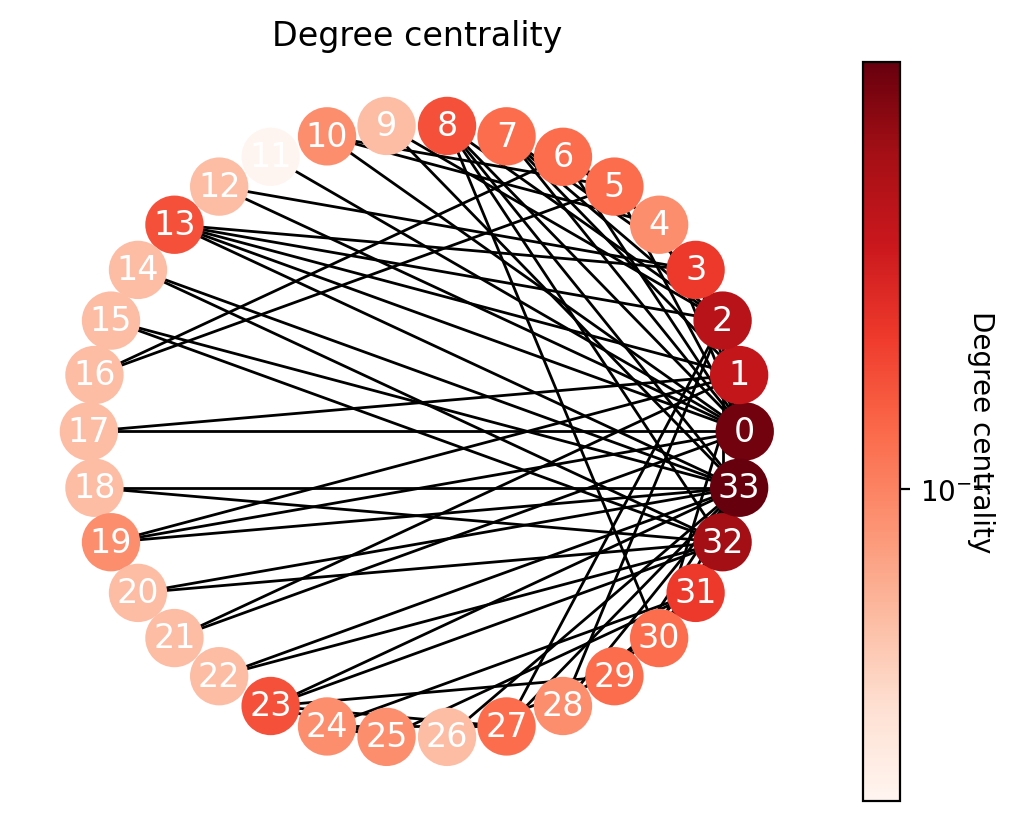

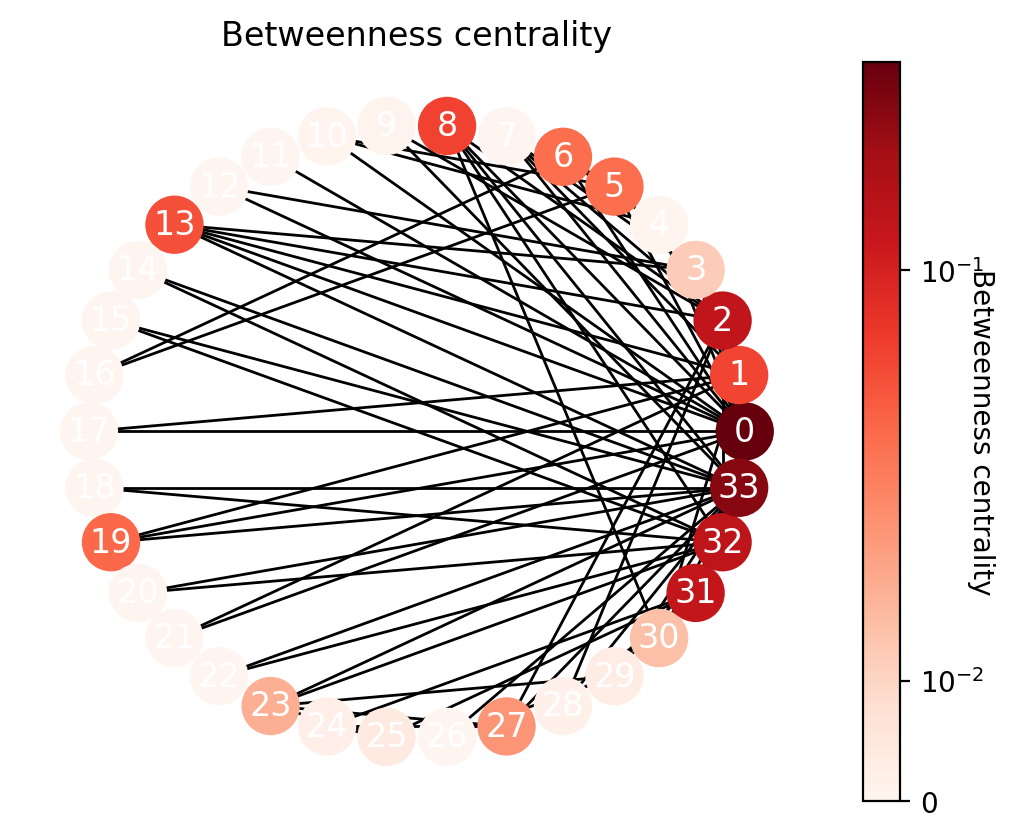

In [17]:
 nodes = nx.draw_networkx_nodes(G,pos, node_size=400, cmap=plt.cm.Reds, 
                                   node_color=list(nx.degree_centrality(G).values()),
                                   nodelist=list(nx.degree_centrality(G).keys())) #<-- Set the node attributes to be plotted,
                                                                   # with the network, the nodes position, 
                                                                   # the color map for the measure that comes 
                                                                   # in numbers ranging in the color map
    
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1)) #<-- Seeting the color map of the nodes in a 
                                                                   #symmetric logaritmic normalized scale
    
labels = nx.draw_networkx_labels(G, pos, font_color='white') #<-- Set the node labels
edges = nx.draw_networkx_edges(G, pos) #<-- Set the edges pisitions

plt.title('Degree centrality') #<-- Set the title of the plot
cbar = plt.colorbar(nodes) #--> set the range of the color bar

cbar.set_label('Degree centrality', rotation=270) #--> Set the label of the color bar and rotate it
    
plt.axis('off') #<-- Remove the axis of the network plot
plt.show()


nodes = nx.draw_networkx_nodes(G,pos, node_size=400, cmap=plt.cm.Reds, 
                                   node_color=list(nx.betweenness_centrality(G).values()),
                                   nodelist=list(nx.betweenness_centrality(G).keys())) #<-- Set the node attributes to be plotted,
                                                                   # with the network, the nodes position, 
                                                                   # the color map for the measure that comes 
                                                                   # in numbers ranging in the color map
    
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1)) #<-- Seeting the color map of the nodes in a 
                                                                   #symmetric logaritmic normalized scale
    
labels = nx.draw_networkx_labels(G, pos, font_color='white') #<-- Set the node labels
edges = nx.draw_networkx_edges(G, pos) #<-- Set the edges pisitions

plt.title('Betweenness centrality') #<-- Set the title of the plot
cbar = plt.colorbar(nodes) #--> set the range of the color bar

cbar.set_label('Betweenness centrality', rotation=270) #--> Set the label of the color bar and rotate it
    
plt.axis('off') #<-- Remove the axis of the network plot
plt.show()

# 5. Facebook data analysis

### Example adapted from https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html

In [18]:
facebook = pd.read_csv(
    "http://snap.stanford.edu/data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

start_node  end_node
0               0         1
1               0         2
2               0         3
3               0         4
4               0         5
...           ...       ...
88229        4026      4030
88230        4027      4031
88231        4027      4032
88232        4027      4038
88233        4031      4038

[88234 rows x 2 columns]

In [19]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

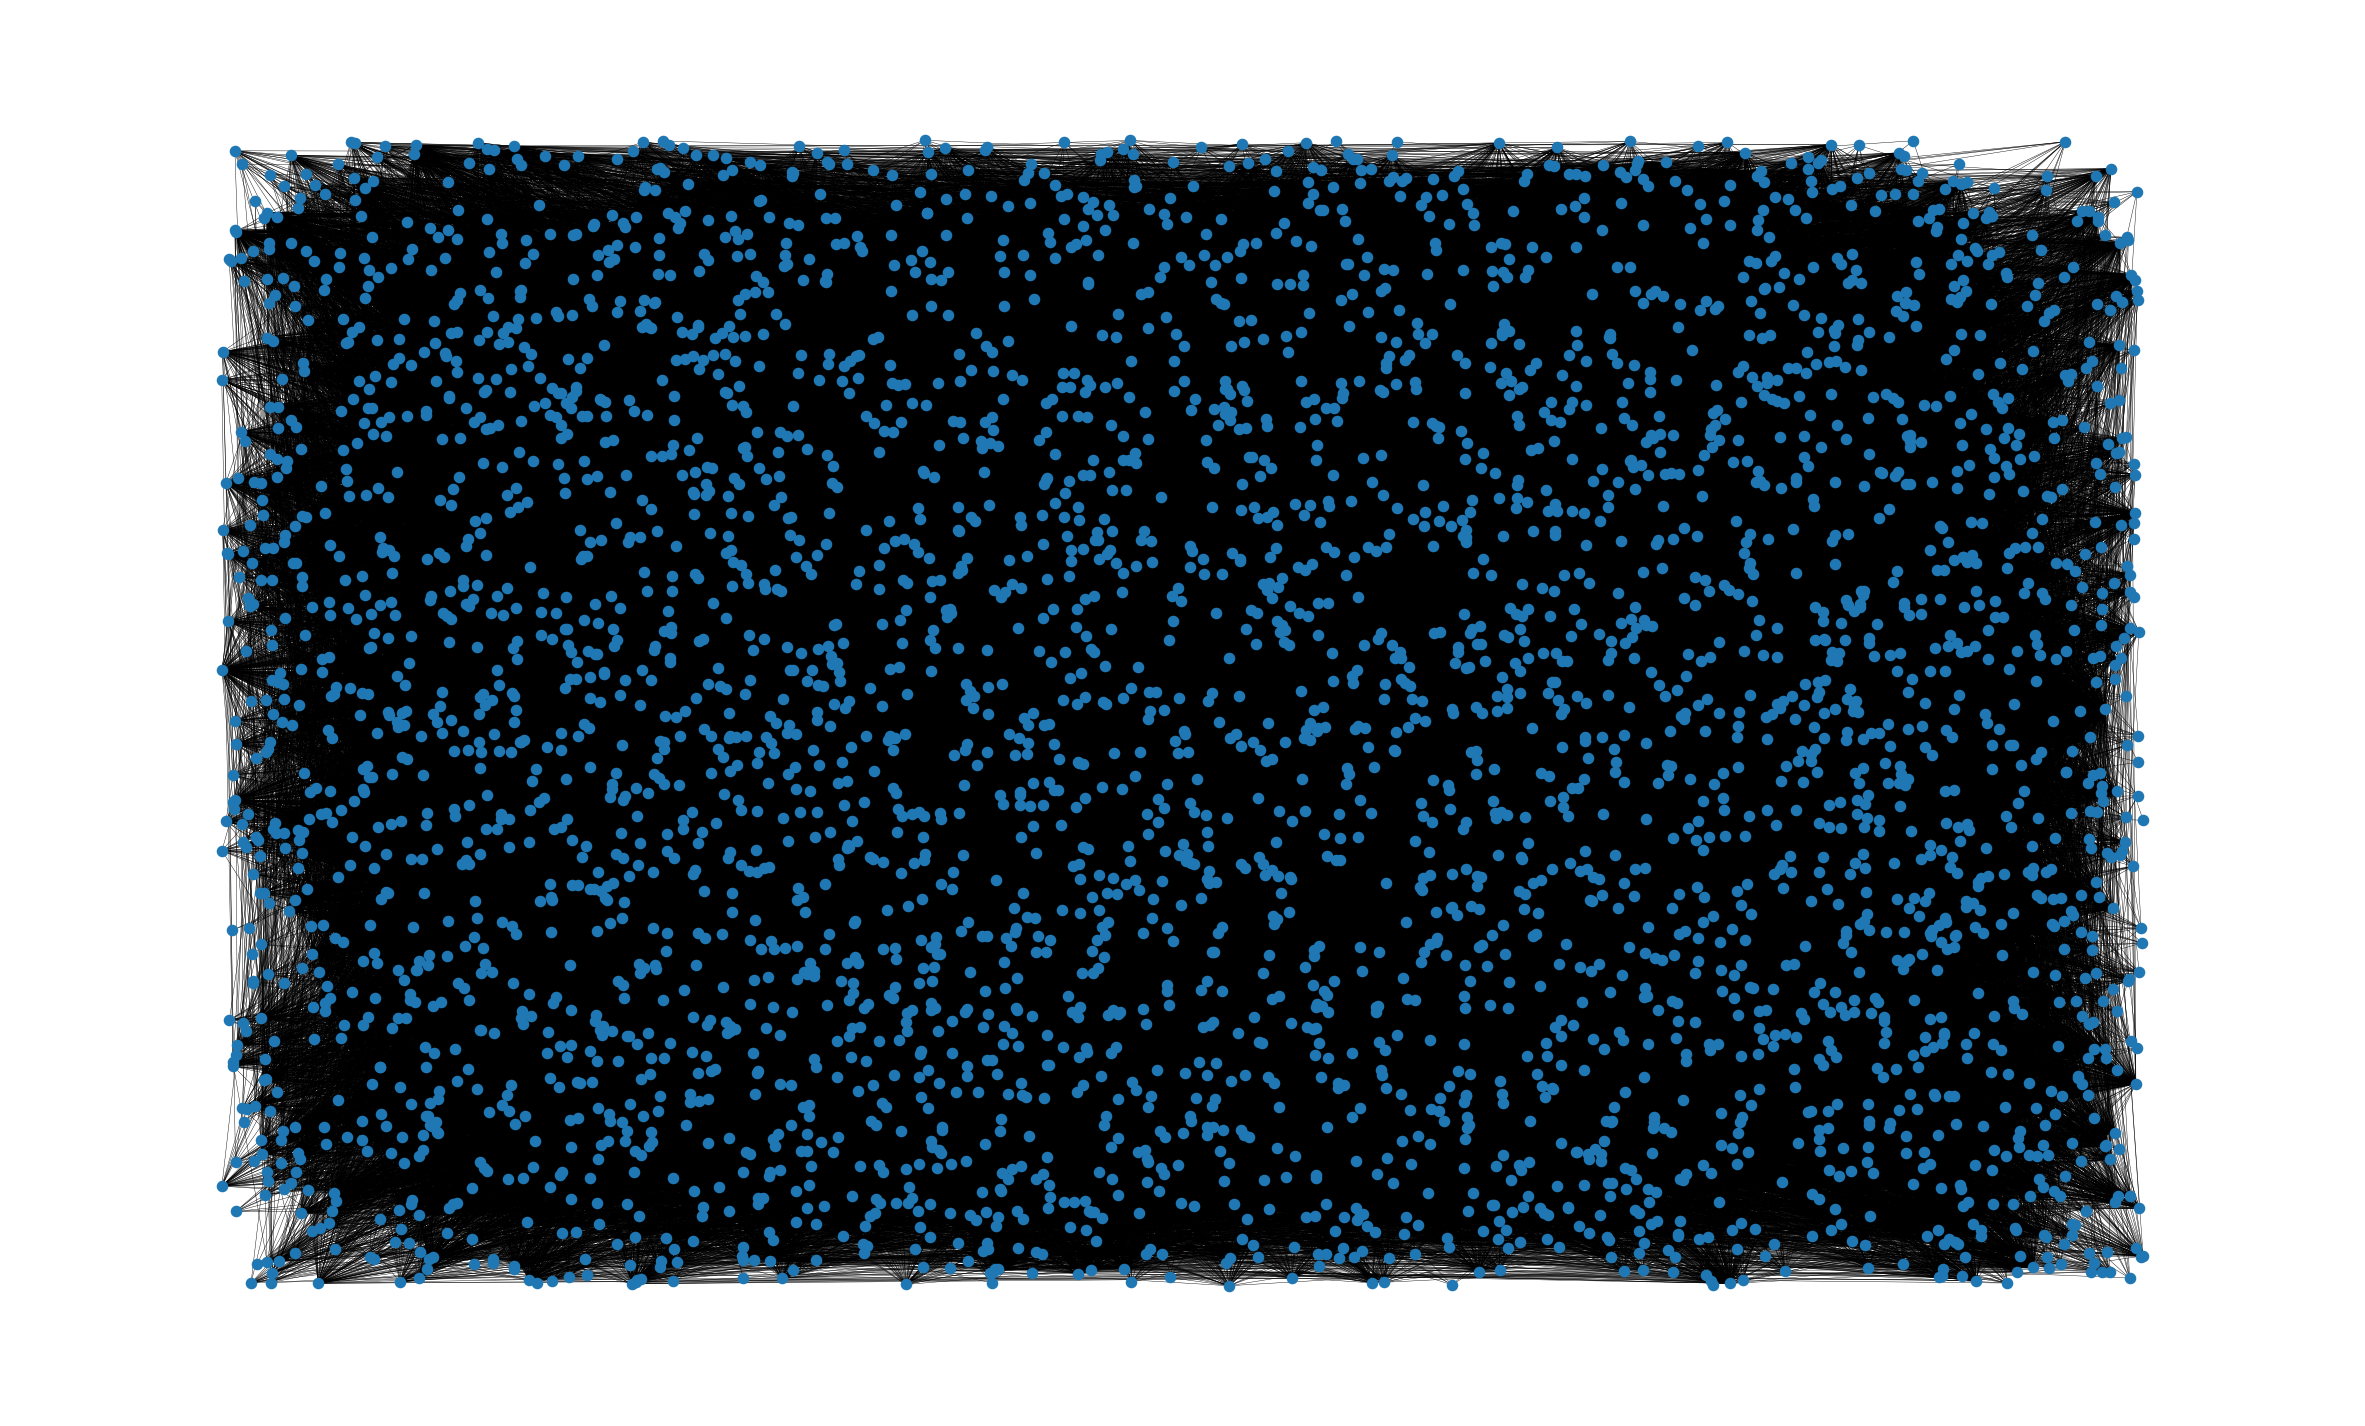

In [20]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

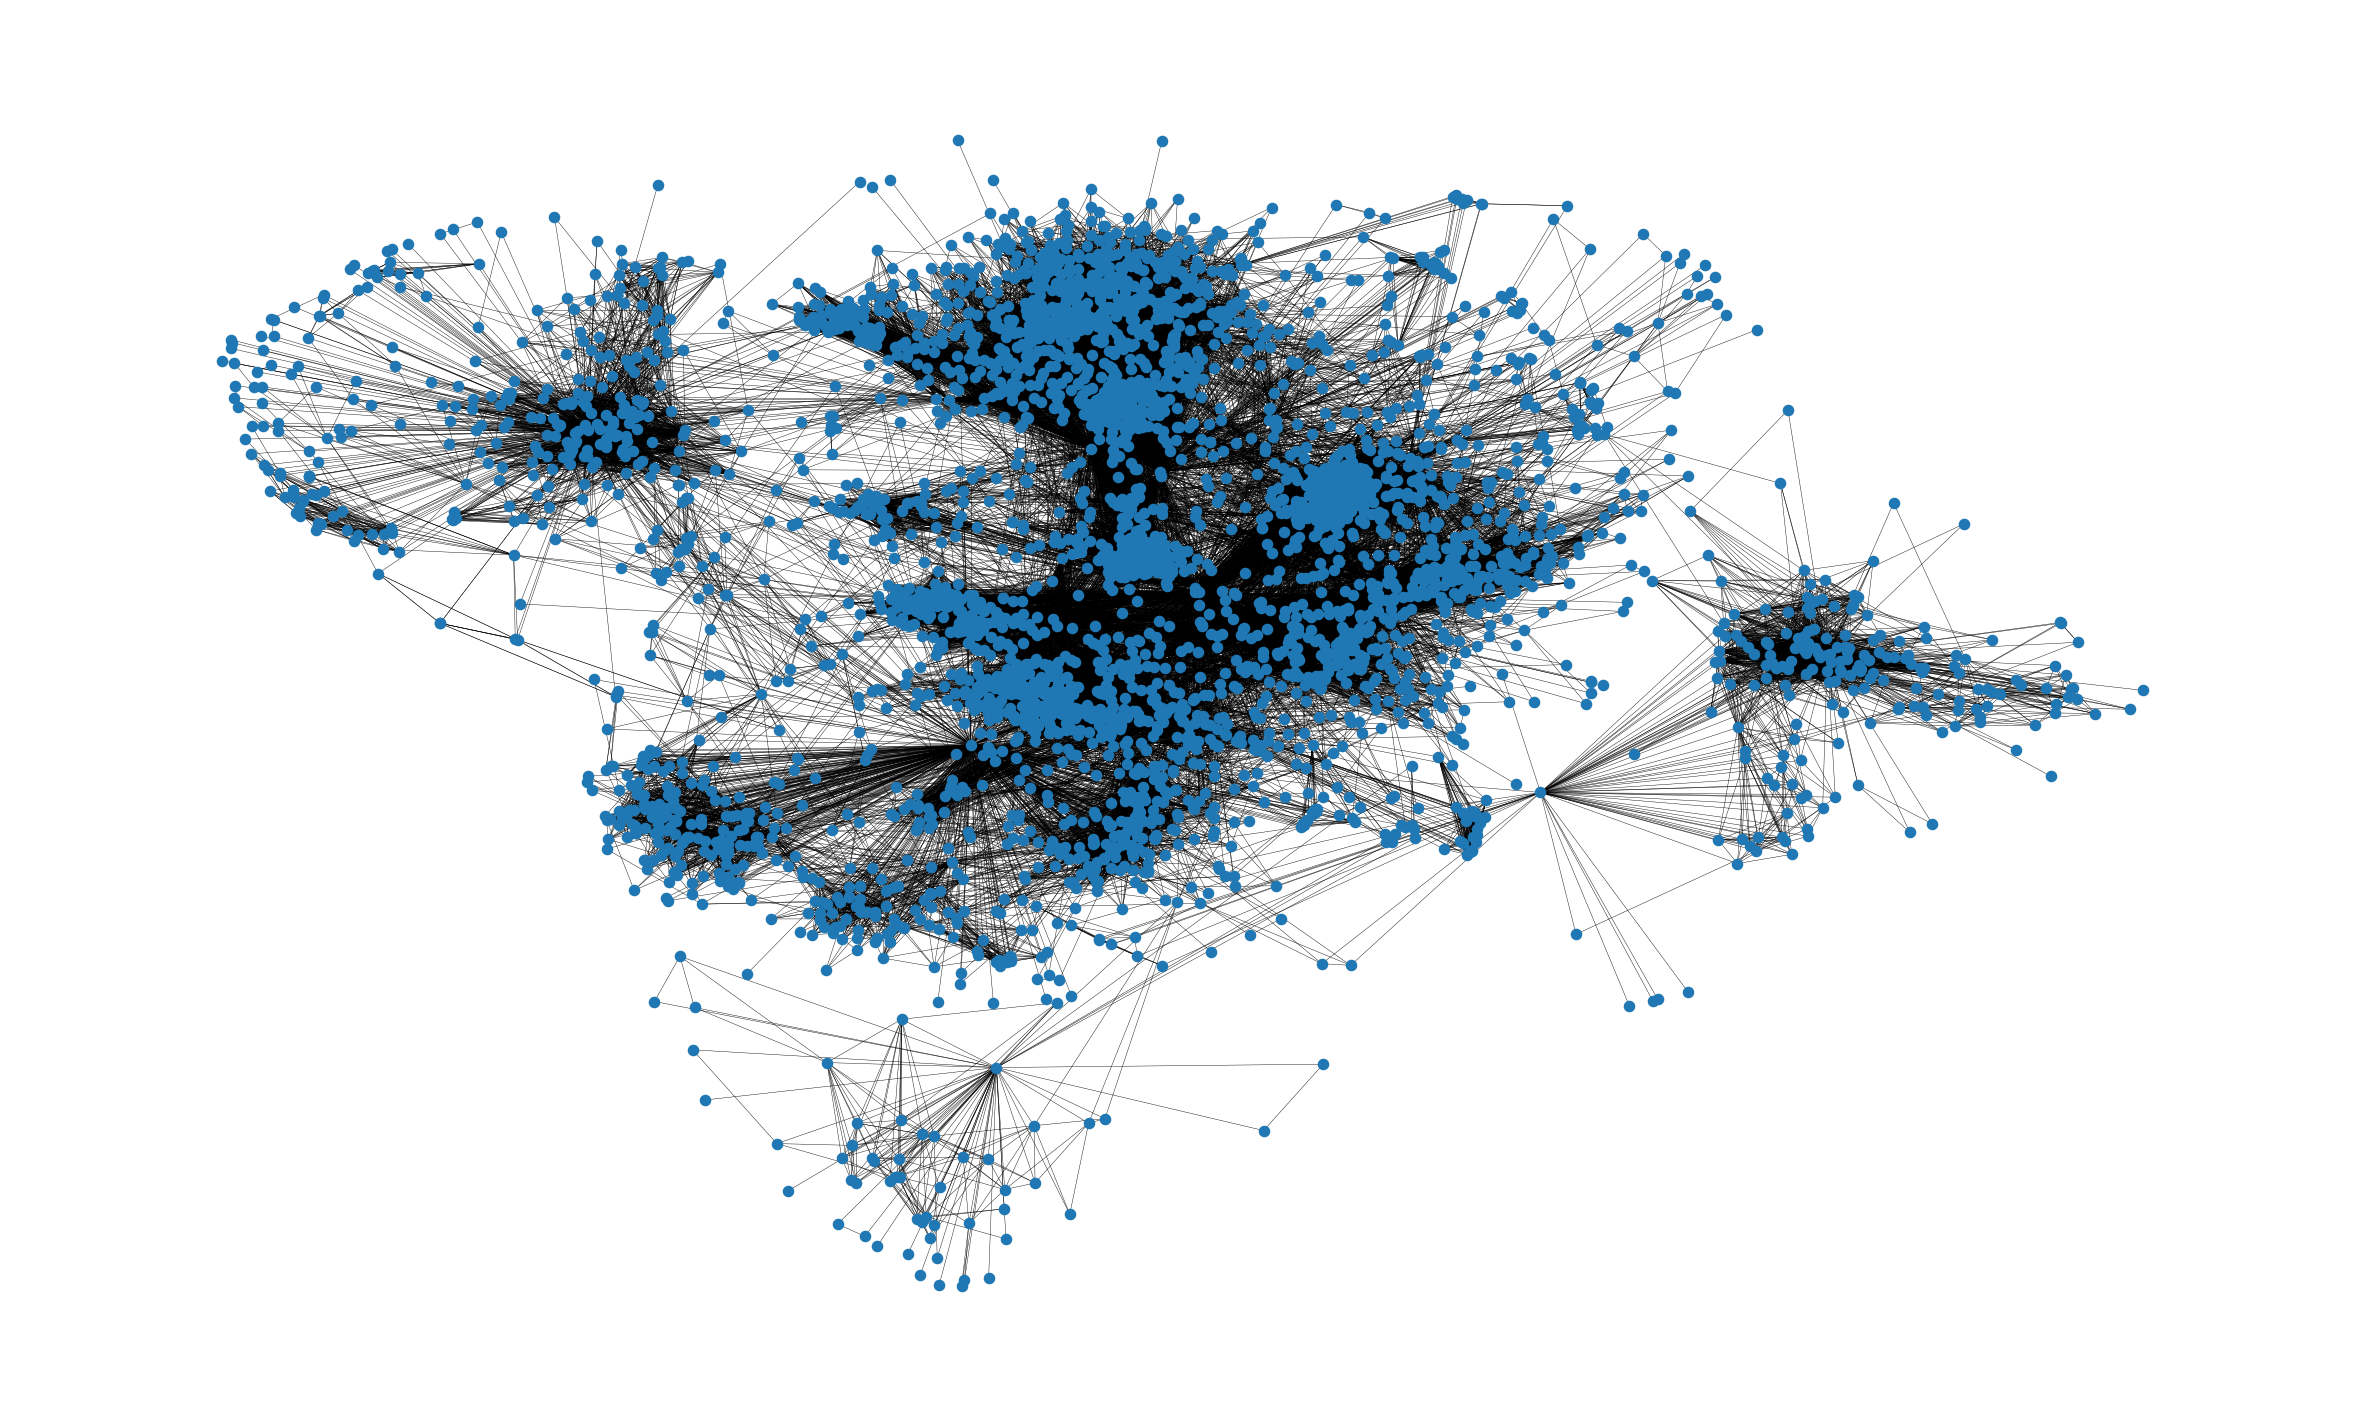

In [21]:
#you will need scipy installed to be able to run this
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [36]:
np.mean([d for _, d in G.degree()])

43.69101262688784

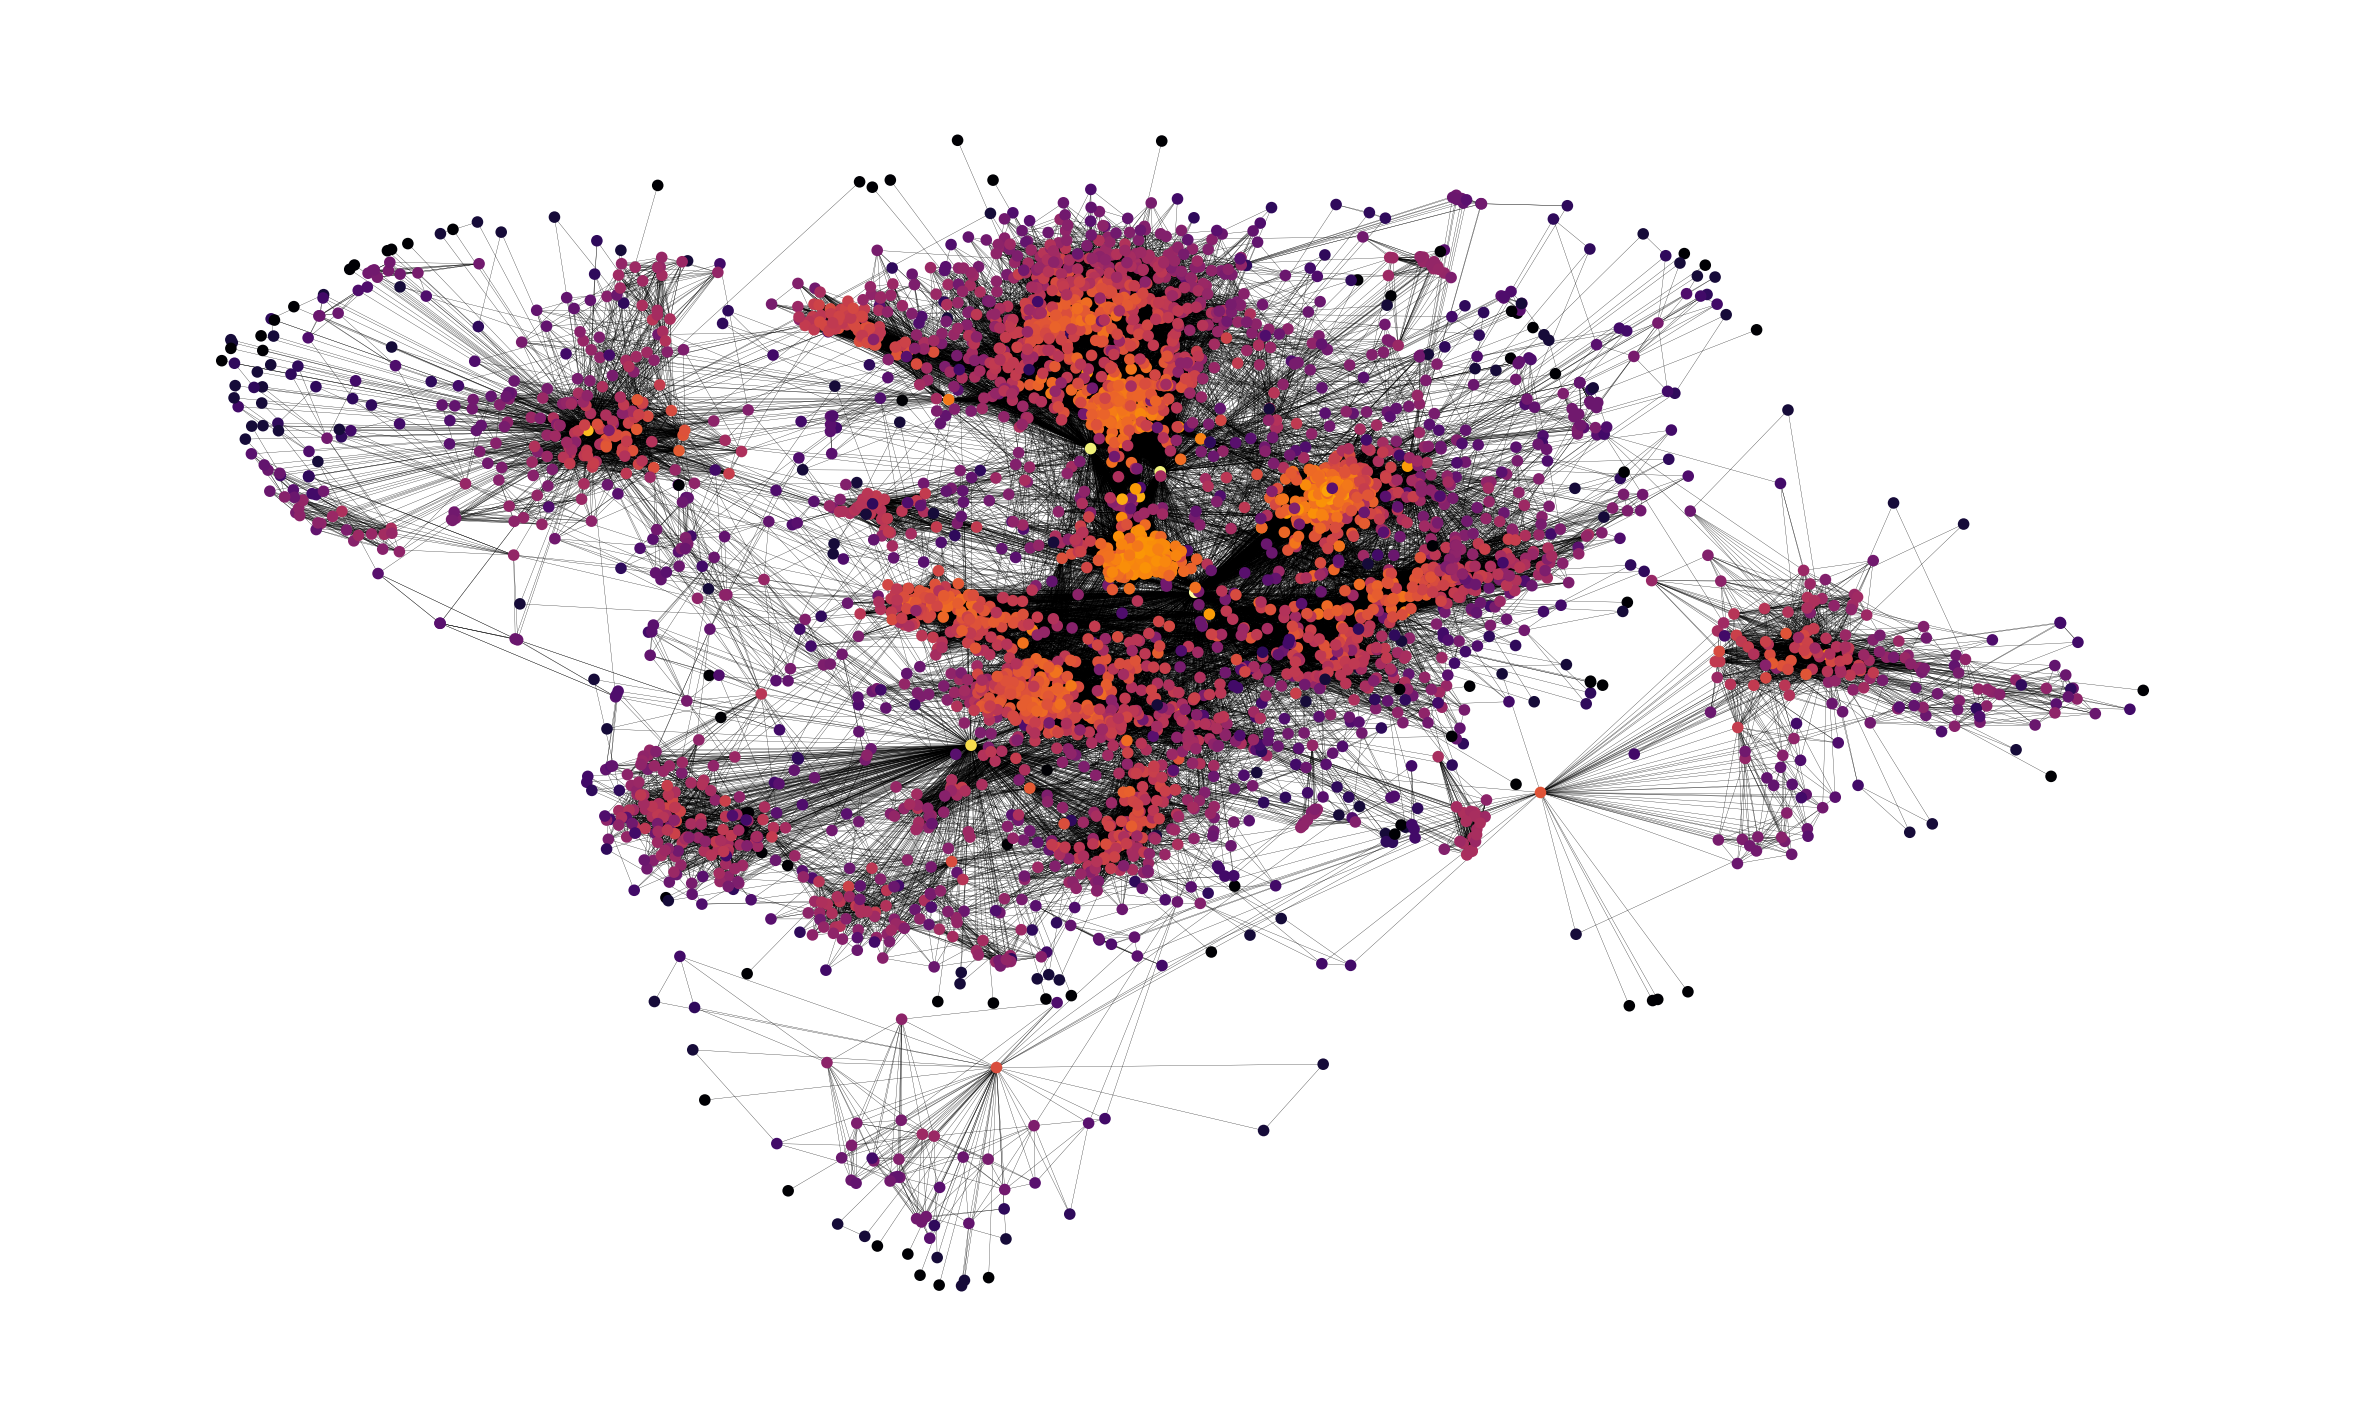

In [58]:
pos = nx.spring_layout(G, iterations=15, seed=1721)

bc = nx.degree_centrality(G)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nodes = nx.draw_networkx_nodes(G,pos, cmap=plt.cm.inferno, node_size = 10,
                                   node_color=list(bc.values()),
                                   nodelist=list(bc.keys())) 
    
nodes.set_norm(mcolors.LogNorm()) 

edges = nx.draw_networkx_edges(G, pos, width = 0.1) 



In [59]:
nx.has_bridges(G)

True

In [66]:
bridges = list(nx.bridges(G))
local_bridges = list(nx.local_bridges(G, with_span=False))

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

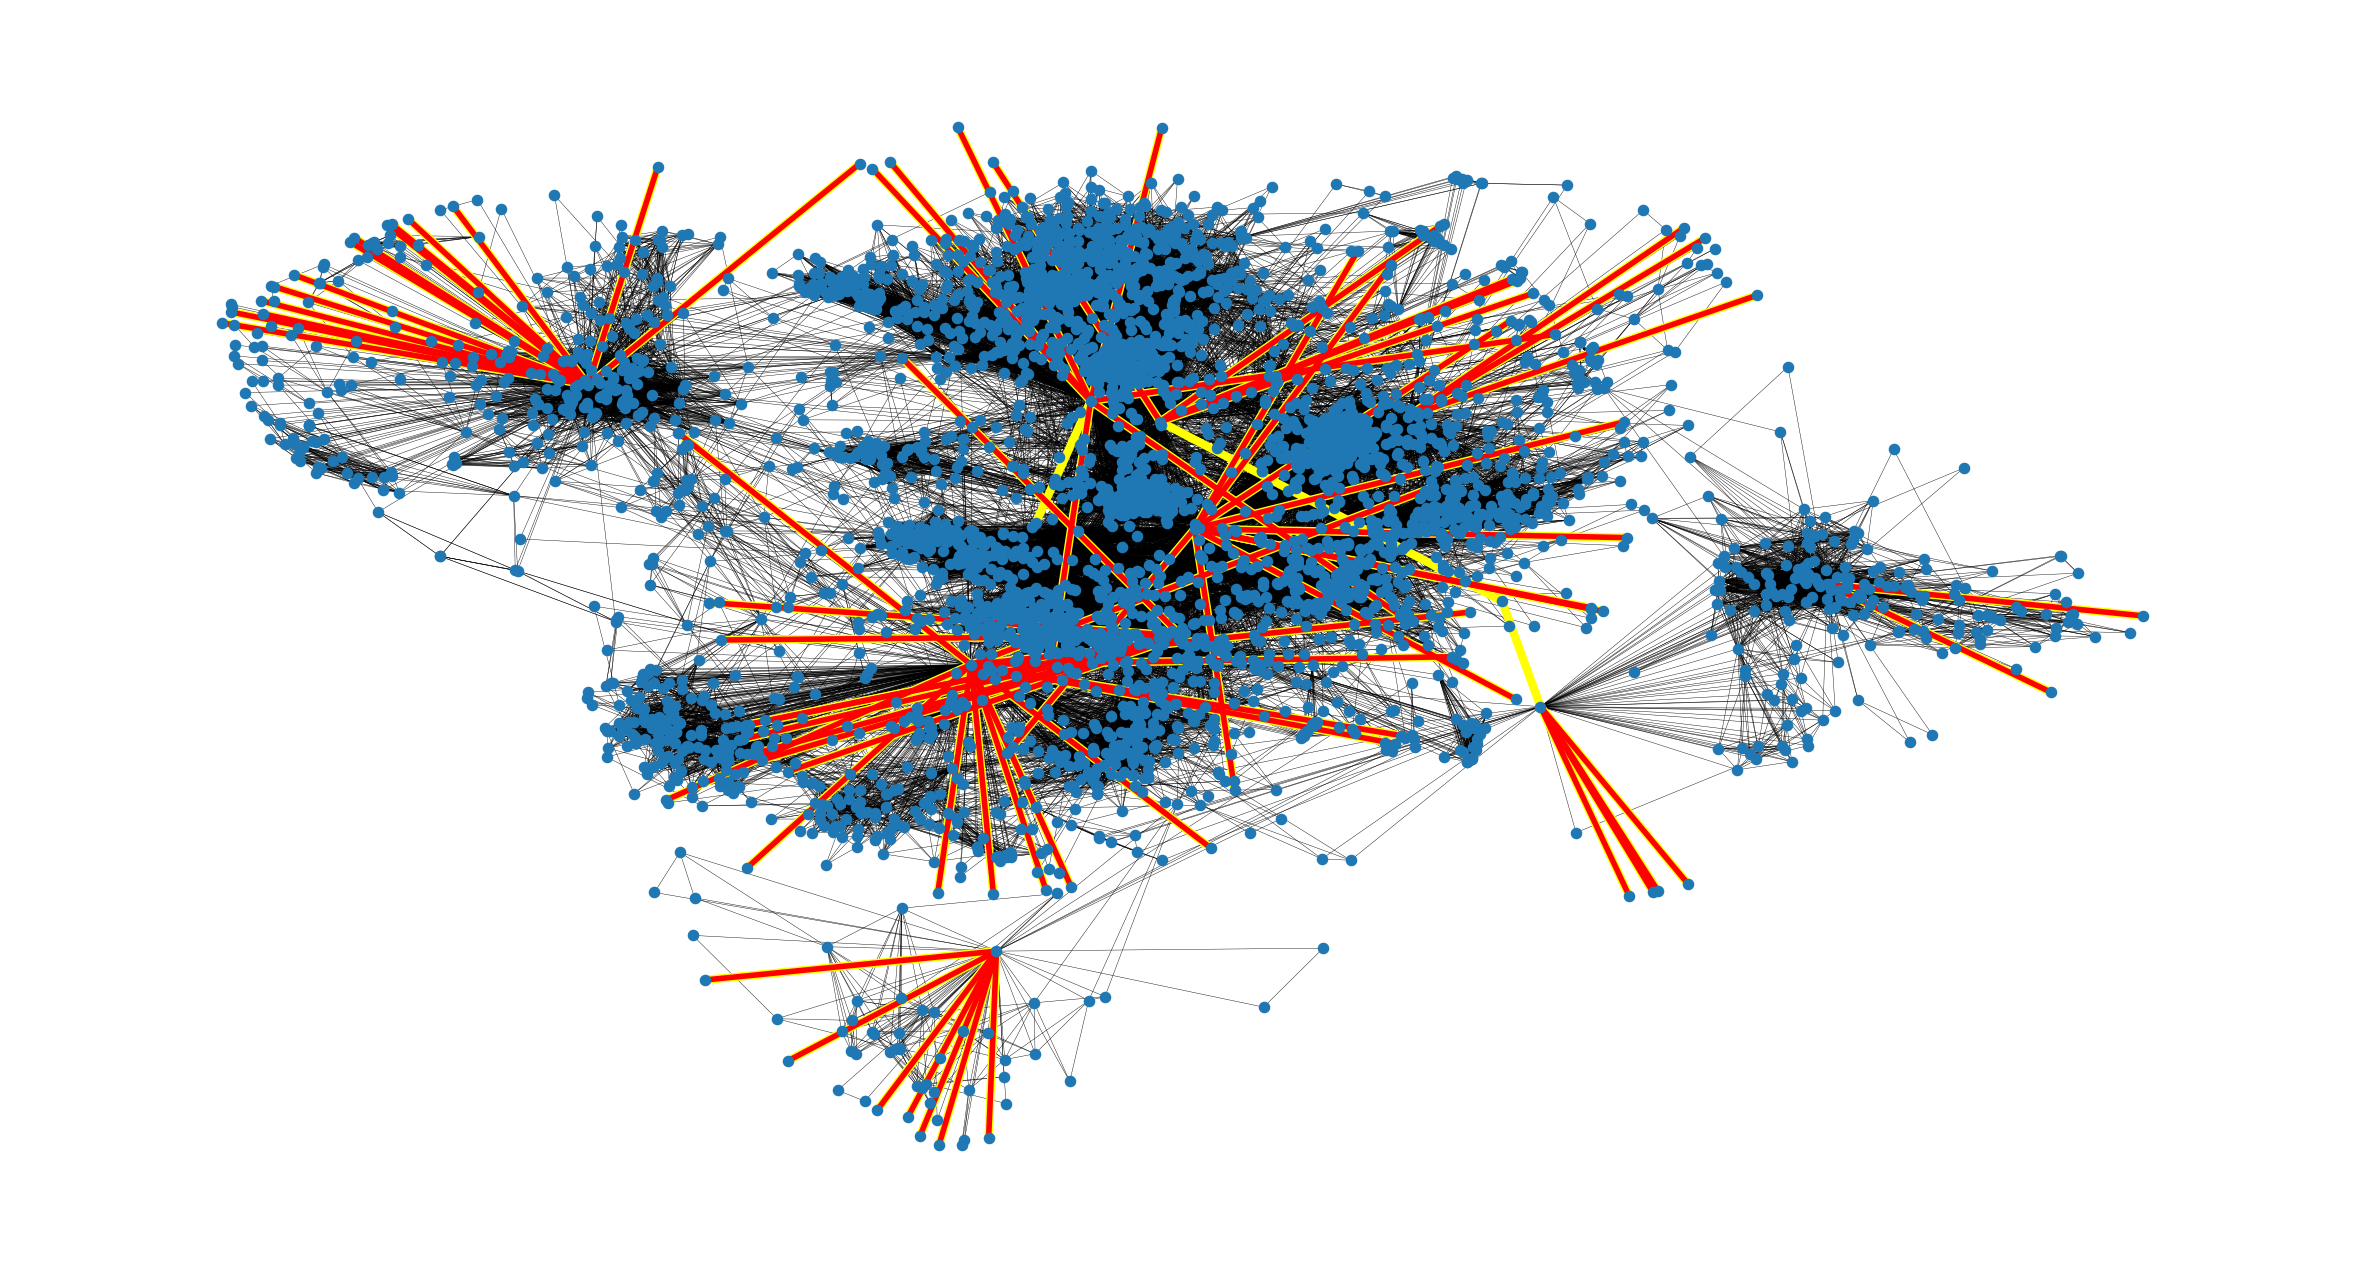

In [73]:
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(
    G, pos, edgelist=local_bridges, width=3, edge_color="yellow"
)  # green color for local bridges
nx.draw_networkx_edges(
    G, pos, edgelist=bridges, width=2, edge_color="r"
)  # red color for bridges
plt.axis("off")

### 5.1 Network statistics - Degree distribution

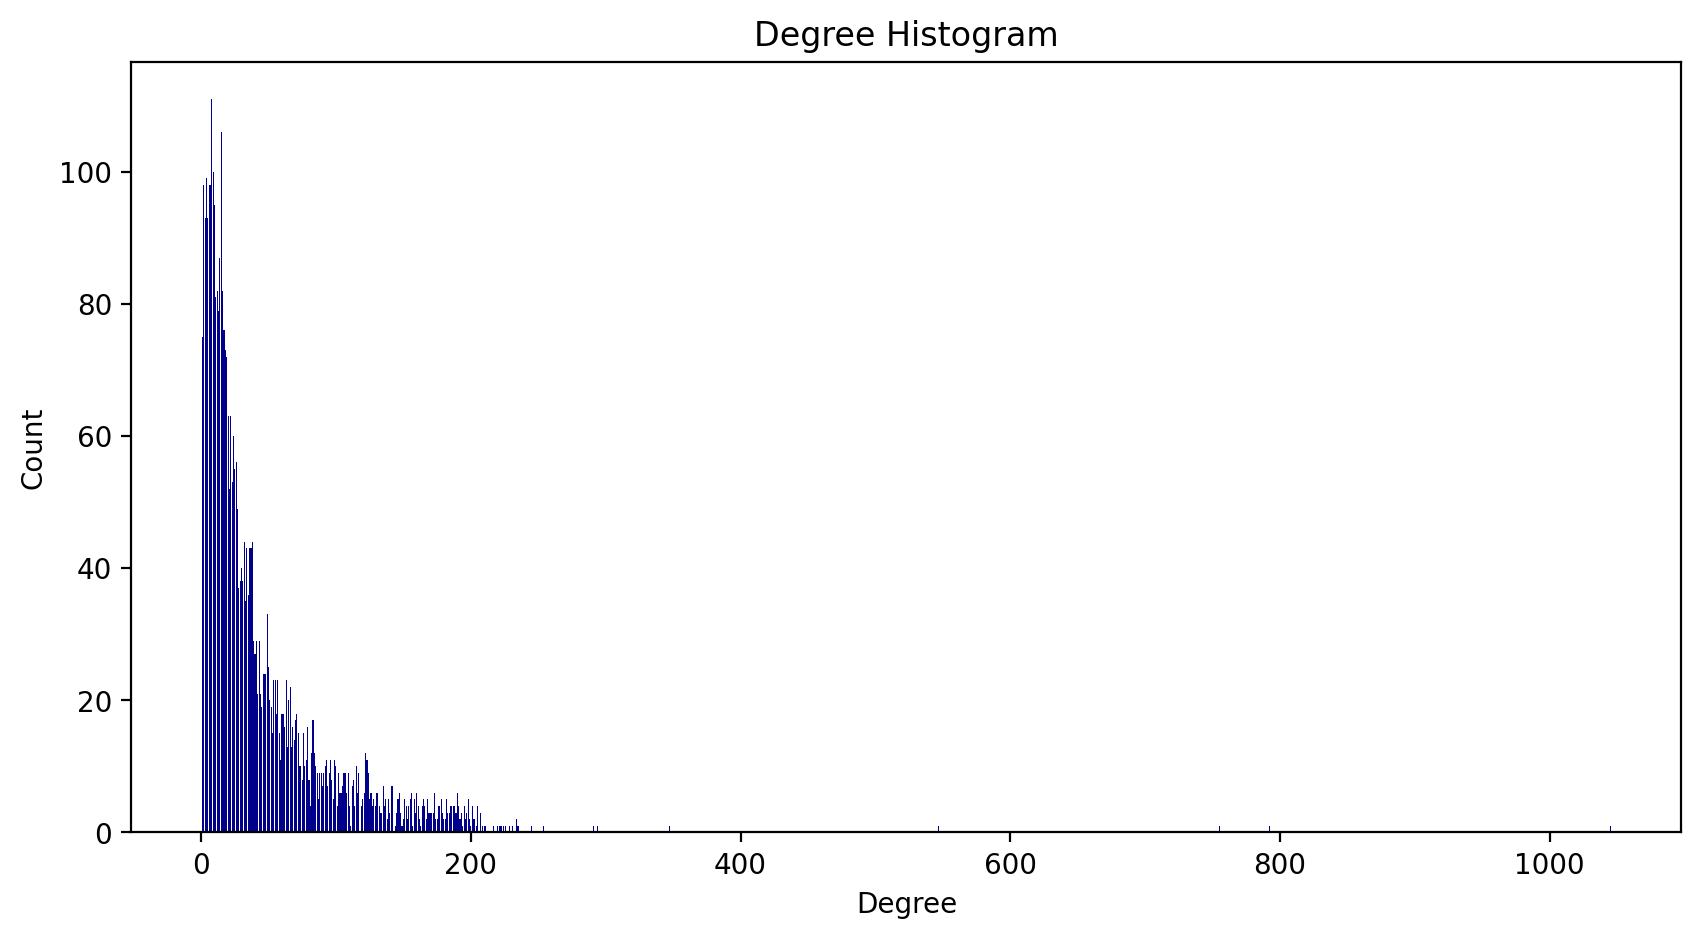

In [26]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  

degreeCount = collections.Counter(degree_sequence)

deg, cnt = zip(*degreeCount.items()) 

rcParams['figure.figsize'] = 10, 5 
fig, ax = plt.subplots()

plt.bar(deg, cnt, width=0.80, color='darkblue')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d + 400 for d in deg])
#ax.set_xticklabels(deg)

plt.show()

In [27]:
print('Average degree', np.mean(G.degree()))
print('Density', nx.density(G))

Average degree 1031.3455063134438
Density 0.010819963503439287


### 5.2 Network Statistics -  Shortest Path

[1, 0, 107, 1000]


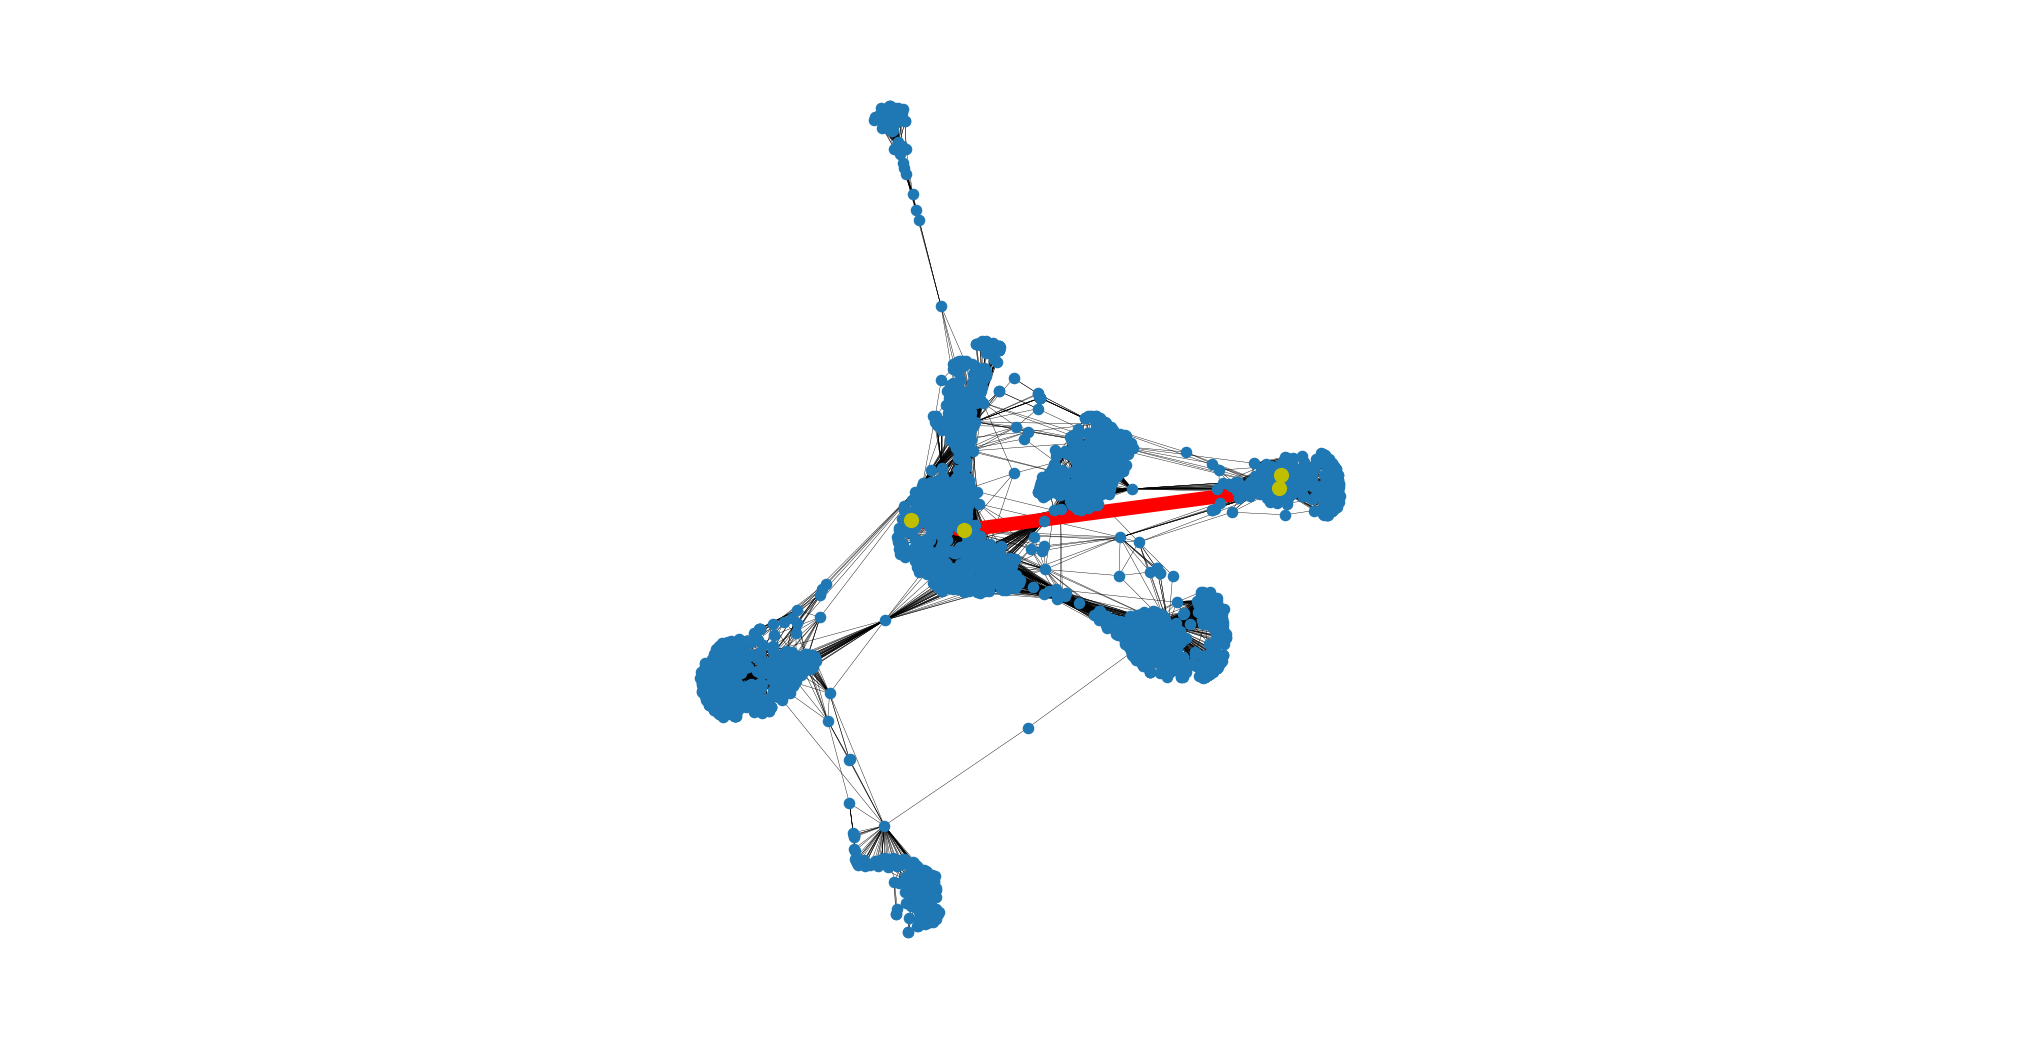

In [34]:
source=1  #<-- Source node
target=1000  #<-- Target node

def short_path_plot(G,source,target):
    '''This function calculates and draws the shortest path between two nodes in a network
    
    Attributes:
    G: The networkx object
    source: Name of the source node
    target: Name of the target node'''
    
    pos = nx.spring_layout(G) 
    nx.draw(G,pos,node_size=10, with_labels=False, width=0.15)

    path = nx.shortest_path(G,source,target) 
    print(path)
    path_edges = list(zip(path,path[1:])) 
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='y', label=True, node_size = 20)  
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r', width = 5)
    plt.axis('equal')
    plt.show()
    return


short_path_plot(G,source,target)